**Here's the code demo for word2vec embedding and t-SNE visualization**

Part I: Load 20Newsgroups dataset

In [9]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
import gensim

# download example data ( may take a while)
train = fetch_20newsgroups()

Part II: Process the 20NewsGroups dataset and train word2vec model. Gensim official doc on the Word2Vec model: https://radimrehurek.com/gensim/models/word2vec.html

In [21]:
def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

sentences = [line for text in train.data for line in clean(text)]


word2vec_model = Word2Vec(sentences, workers=4, size=100, min_count=50, window=10, sample=1e-3)

print (word2vec_model.most_similar('memory'))

X = word2vec_model[word2vec_model.wv.vocab]

[('cpu', 0.8344771265983582), ('cache', 0.7992579936981201), ('timing', 0.7792127132415771), ('ram', 0.7656692862510681), ('monitor', 0.7506502270698547), ('mode', 0.7418009042739868), ('configuration', 0.7401096820831299), ('video', 0.7397545576095581), ('setup', 0.7394328713417053), ('vram', 0.73739093542099)]


Part III: Display word2vec visualization with tSNE

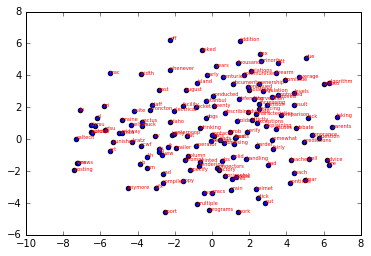

In [23]:
tsne = TSNE(n_components=2)
# get tSNE transform of first 150 words in word2vec model vocabulary
X_tsne = tsne.fit_transform(X[:150,:])

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
# annotate words om plot
for label, x, y in zip(word2vec_model.wv.vocab, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=5, color = "#ff0000")


plt.savefig('tsne.png', dpi=400, transparent=True )
plt.show()